In [9]:
# %% raw
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy import signal
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['HSA_OVERRIDE_GFX_VERSION'] = '10.3.0'
os.environ['LD_LIBRARY_PATH'] = '$LD_LIBRARY_PATH:/opt/rocm-5.3.0/lib'

weather_data = pd.read_csv('london_weather.csv')
weather_data = weather_data[['date', 'mean_temp', 'sunshine','global_radiation','max_temp','min_temp']]
weather_data = weather_data.set_index('date', drop = True)
weather_data.index = pd.to_datetime(weather_data.index,format="%Y%m%d")
weather_data = weather_data.interpolate(method='time')
weather_data = weather_data[:-359]

values = weather_data.values

In [12]:
training_data_len = math.ceil(len(values) * 0.8)
np.random.seed(80)
fs = 1
ts = np.arange(len(values[:,0]))

In [26]:
b, a = signal.iirfilter(4, 0.03, btype="low", ftype="butter")
print(b, a, sep="\n")
values_filt = [None] * 5
for i in range(5):
    values_filt[i] = signal.filtfilt(b, a , values[:,i])
values_filt = np.array(values_filt).transpose()

[4.37268880e-06 1.74907552e-05 2.62361328e-05 1.74907552e-05
 4.37268880e-06]
[ 1.         -3.75376276  5.29115258 -3.3189386   0.78161874]


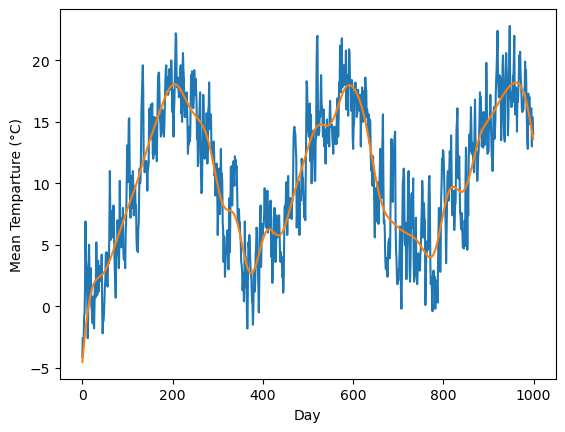

In [27]:
plt.figure()
plt.plot(values[0:1000, 0], label="Raw")
plt.plot(values_filt[0:1000, 0], label="IIR filtered")
plt.ylabel("Mean Temparture (\N{DEGREE SIGN}C)")
plt.xlabel("Day")
plt.show()

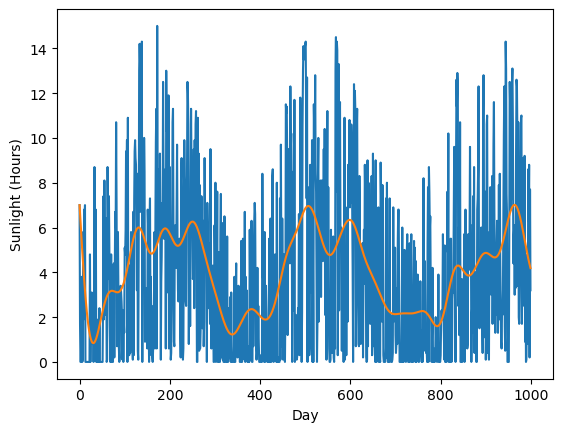

In [28]:
plt.figure()
plt.plot(values[0:1000, 1], label="Raw")
plt.plot(values_filt[0:1000, 1], label="IIR filtered")
plt.ylabel("Sunlight (Hours)")
plt.xlabel("Day")
plt.show()

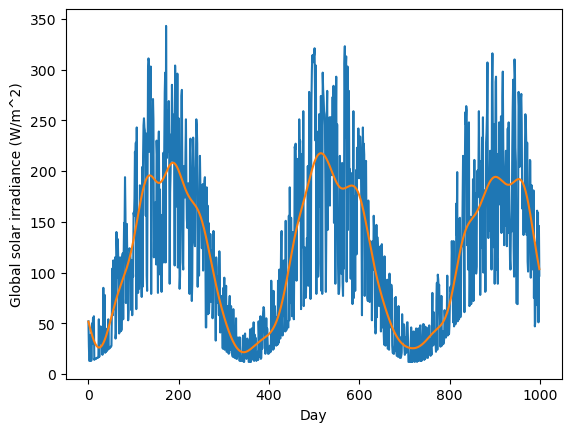

In [29]:
plt.figure()
plt.plot(values[0:1000, 2], label="Raw")
plt.plot(values_filt[0:1000, 2], label="IIR filtered")
plt.ylabel("Global solar irradiance (W/m^2)")
plt.xlabel("Day")
plt.show()

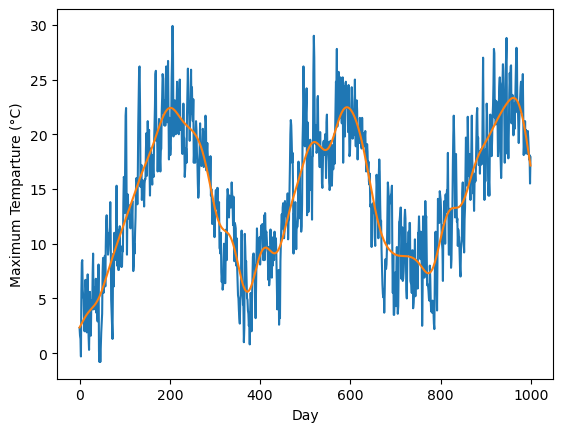

In [30]:
plt.figure()
plt.plot(values[0:1000, 3], label="Raw")
plt.plot(values_filt[0:1000, 3], label="IIR filtered")
plt.ylabel("Maximum Temparture (\N{DEGREE SIGN}C)")
plt.xlabel("Day")
plt.show()

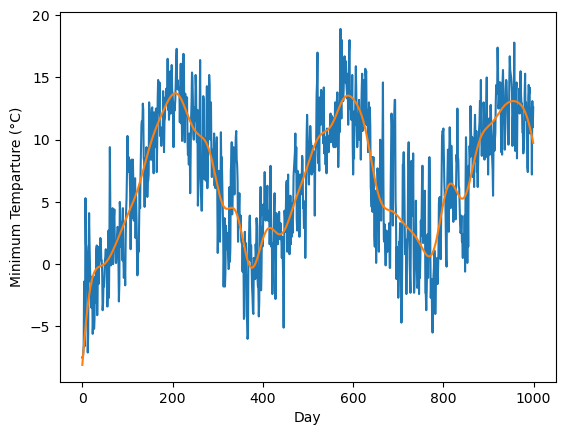

In [31]:
plt.figure()
plt.plot(values[0:1000, 4], label="Raw")
plt.plot(values_filt[0:1000, 4], label="IIR filtered")
plt.ylabel("Minimum Temparture (\N{DEGREE SIGN}C)")
plt.xlabel("Day")
plt.show()